In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')

In [ ]:
#mendownload dataset kendaraan_train.csv
!gdown --id 1RE7SGl1hCcDHz9FW_U46gyJO33Rg45hs
#mendownload dataset kendaraan_test.csv
!gdown --id 1ENra_zD5tAy9pmevvELzd6e5c3j4MyQM

Downloading...
From: https://drive.google.com/uc?id=1RE7SGl1hCcDHz9FW_U46gyJO33Rg45hs
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 52.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ENra_zD5tAy9pmevvELzd6e5c3j4MyQM
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 72.6MB/s]


# Data Pre-Processing
1. Mengisi missing value
2. Encoding categorical data
3. Menghapus data duplikat

In [ ]:
# Import data dan melihat rangkuman statistik data
df_train = pd.read_csv("kendaraan_train.csv")
df_train.describe(include="all")

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271391,271617.000000,271427.000000,271525.000000,271602.000000,271556,271643,271262.000000,271532.000000,271839.000000,285831.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Pria,NaN,NaN,NaN,NaN,1-2 Tahun,Pernah,NaN,NaN,NaN,NaN
freq,NaN,146678,NaN,NaN,NaN,NaN,142761,137123,NaN,NaN,NaN,NaN
mean,142916.000000,NaN,38.844336,0.997848,26.405410,0.458778,NaN,NaN,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,NaN,15.522487,0.046335,13.252714,0.498299,NaN,NaN,17155.000770,54.202457,83.694910,0.327830
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39377.750000,152.000000,227.000000,0.000000


In [ ]:
#menampilkan 5 data teratas
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
#mengecek missing value dari setiap kolomnya 
df_train.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
#melihat tipe data dari masing-masing kolom
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
#mengganti kolom yang memiliki tipe data object menjadi numerik
def encoding(df):
    cleanup_category = {
        "Jenis_Kelamin": {
           "Pria": 1.0,
           "Wanita": 0.0
        },
        "Umur_Kendaraan": {
            "< 1 Tahun": 0.0,
            "1-2 Tahun": 1.0,
            "> 2 Tahun": 2.0
        },
        "Kendaraan_Rusak": {
             "Tidak": 0.0,
             "Pernah": 1.0
        }
    }
    df_clean = df.replace(cleanup_category)
    return df_clean

In [ ]:
#fungsi untuk mengambil nilai modus dari dataset yang tersedia
def get_modus(column, dataset):
    index = dataset[column].value_counts().argmax()
    label = dataset[column].value_counts().index.tolist()[index]
    return label

In [ ]:
#fungsi untuk mengisi data yang kosong (missing value)
def fill_missing_value(df):
    df = df.fillna({
        "Umur":np.ceil(df["Umur"].mean()),
        "Jenis_Kelamin": get_modus("Jenis_Kelamin", df),
        "SIM": np.ceil(df["SIM"].mean()),
        "Kode_Daerah": np.ceil(df["Kode_Daerah"].mean()),
        "Sudah_Asuransi": np.ceil(df["Sudah_Asuransi"].mean()),
        "Umur_Kendaraan": get_modus("Umur_Kendaraan", df),
        "Kendaraan_Rusak": get_modus("Kendaraan_Rusak", df),
        "Premi": np.ceil(df["Premi"].mean()),
        "Kanal_Penjualan": np.ceil(df["Kanal_Penjualan"].mean()),
        "Lama_Berlangganan": np.ceil(df["Lama_Berlangganan"].mean()),
    })
    return df

In [ ]:
#menyimpan dataset yang sudah tidak ada data kosong ke dalam variabel df_train
df_train = fill_missing_value(df_train)

In [ ]:
df_train.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
df_train = encoding(df_train)
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,3,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0,0


In [ ]:
def cleaning_dataset(df):
  # encoding categorical data
  df_clean = encoding(df)

  # Mengisi missing value
  df_clean = fill_missing_value(df_clean) 

  # menghapus data duplikat
  df_clean.drop_duplicates(keep = False, inplace = True)

  return df_clean

# Main Program




In [ ]:
# Import data train & data test
df_train = pd.read_csv("kendaraan_train.csv")
df_train = cleaning_dataset(df_train)

df_test = pd.read_csv("kendaraan_test.csv")
df_test = cleaning_dataset(df_test)

In [ ]:
df_train.sample(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
158709,158710,1.0,51.0,1.0,28.0,0.0,1.0,1.0,54154.0,26.0,272.0,0
158191,158192,0.0,23.0,1.0,30.0,1.0,0.0,0.0,27872.0,152.0,171.0,0
83817,83818,1.0,37.0,1.0,41.0,0.0,1.0,1.0,37549.0,26.0,265.0,0
52537,52538,0.0,23.0,1.0,10.0,1.0,0.0,0.0,30537.0,152.0,39.0,0
189524,189525,0.0,39.0,1.0,39.0,1.0,0.0,0.0,2630.0,152.0,235.0,0


In [ ]:
# Membuat fungsi untuk spliting data
def split_data(df):
  X = df_train.drop("Tertarik", axis=1)
  Y = df_train["Tertarik"]

  return X, Y

In [ ]:
X, Y = split_data(df_train)
X.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
2,3,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0


In [ ]:
# Normalisasi data train menggunakan minmaxscaler
scaler_train = MinMaxScaler()
X = scaler_train.fit_transform(X)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)
# Pemodelan
names = [
    "Logistic Regression",
    "Random Forest",
    "Decision Tree",
    "K-Nearest Neighbors",
]
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(2)
]

# Melakukan training data
models = []
for classifier in classifiers:
  models.append(classifier.fit(X_train, Y_train))

In [ ]:
def evaluation(model, name, x_test, y_test):
  y_pred = model.predict(x_test)
  fig, ax = plt.subplots(figsize=(8,5))
  
  confusion_matrix(y_test, y_pred)
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)

  plt.xlabel("Predict Label")
  plt.ylabel("True Label")
  plt.title(name)
  plt.show()

  print(classification_report(y_test, y_pred))

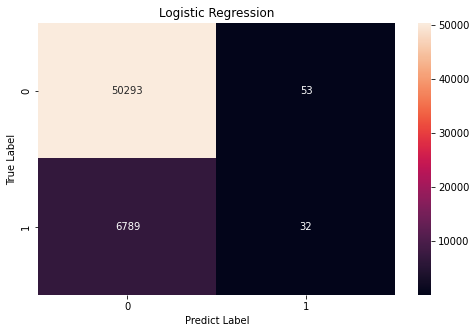

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     50346
           1       0.38      0.00      0.01      6821

    accuracy                           0.88     57167
   macro avg       0.63      0.50      0.47     57167
weighted avg       0.82      0.88      0.83     57167



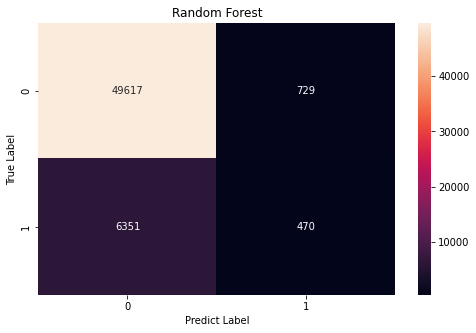

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     50346
           1       0.39      0.07      0.12      6821

    accuracy                           0.88     57167
   macro avg       0.64      0.53      0.53     57167
weighted avg       0.83      0.88      0.84     57167



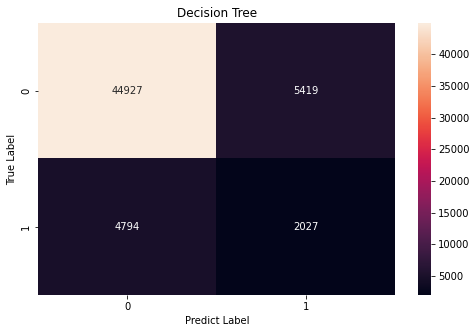

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     50346
           1       0.27      0.30      0.28      6821

    accuracy                           0.82     57167
   macro avg       0.59      0.59      0.59     57167
weighted avg       0.83      0.82      0.82     57167



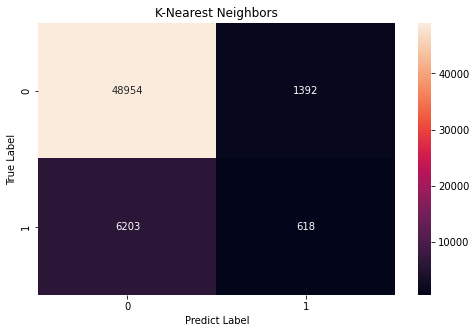

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     50346
           1       0.31      0.09      0.14      6821

    accuracy                           0.87     57167
   macro avg       0.60      0.53      0.53     57167
weighted avg       0.82      0.87      0.83     57167



In [ ]:
# Evaluasi
for model, name in zip(models, names):
  evaluation(model, name, X_val, Y_val)

In [ ]:
# Split data test
x_test, y_test = split_data(df_test)
x_test.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
2,3,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0


In [ ]:
# # Normalisasi data test menggunakan minmaxscaler
x_test = scaler_train.fit_transform(X)

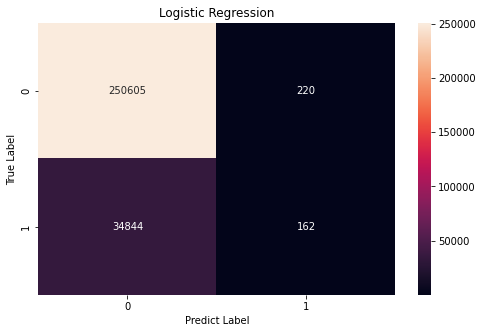

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    250825
           1       0.42      0.00      0.01     35006

    accuracy                           0.88    285831
   macro avg       0.65      0.50      0.47    285831
weighted avg       0.82      0.88      0.82    285831



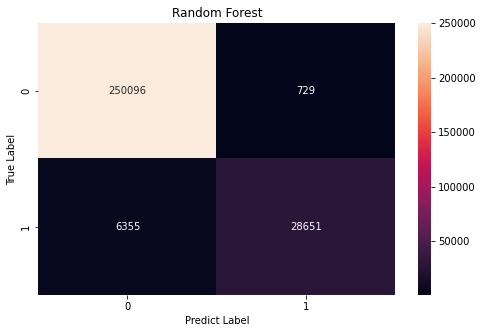

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    250825
           1       0.98      0.82      0.89     35006

    accuracy                           0.98    285831
   macro avg       0.98      0.91      0.94    285831
weighted avg       0.98      0.98      0.97    285831



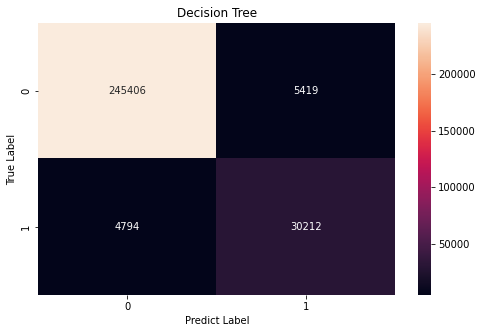

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    250825
           1       0.85      0.86      0.86     35006

    accuracy                           0.96    285831
   macro avg       0.91      0.92      0.92    285831
weighted avg       0.96      0.96      0.96    285831



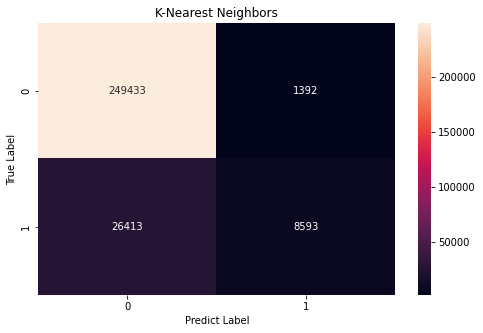

              precision    recall  f1-score   support

           0       0.90      0.99      0.95    250825
           1       0.86      0.25      0.38     35006

    accuracy                           0.90    285831
   macro avg       0.88      0.62      0.66    285831
weighted avg       0.90      0.90      0.88    285831



In [ ]:
for model, name in zip(models, names):
  evaluation(model, name, x_test, y_test)